## Análisis de sentimientos de Twitter con Python
* https://platzi.com/tutoriales/1874-python-lenguaje-natural/5654-realiza-un-analisis-de-sentimiento-en-3-pasos-con-python/
    * Ejemplo https://twitter.com/whaleandjaguar_?lang=en
* https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
* https://www.justintodata.com/twitter-sentiment-analysis-python/
* https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python

### 1) Descargar tweets

In [183]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [184]:
import pandas as pd
pd.set_option('display.max_colwidth',500)

In [215]:
df=pd.read_json('https://raw.githubusercontent.com/restrepo/twitter/main/tweets_df.json')

### 2) Análisis de sentimientos

In [186]:
from textblob import TextBlob

In [187]:
TextBlob('the day is bright').polarity

0.7000000000000001

In [188]:
TextBlob('the day is gray').polarity

0.0

In [189]:
TextBlob('the day is dark').polarity

-0.15

Pero sólo funciona en inglés

In [190]:
TextBlob('el día es oscuro').polarity

0.0

Para usar algo similar en español, el texto debe traducirse primero

In [ ]:
TextBlob('el día es oscuro').translate(from_lang='es',to='en')

In [ ]:
TextBlob('el día es oscuro').translate(from_lang='es',to='en').polarity

### 2. Limitar los tweets a 500 palabras
Los apis de traducción tienen límites muy fuertes. Por lo que el análisis se puede hacer sólo de forma limitada

In [295]:
data=df.sample(100).reset_index(drop=True)

In [296]:
data['tweet']=data['text'].str.split(':').str[-1]

In [297]:
len(data['tweet'].sum())

9979

In [298]:
data.loc[[10]]

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,id,label,tweet
10,Maritza,,,False,2021-05-18 17:40:43,"RT @RaquelS_FlorezM: Educación de calidad para Colombia, el Agro, la Internacionalización y la Innovación #TemporalesSENAFormalizados No a…",[TemporalesSENAFormalizados],Twitter for Android,1394709547588202500,None,"Educación de calidad para Colombia, el Agro, la Internacionalización y la Innovación #TemporalesSENAFormalizados No a…"


In [302]:
from textblob.exceptions import *

In [303]:
polarity=[]
for tweet in data['tweet']:
    #print(tweet)
    try:
        analysis=TextBlob(tweet).translate(from_lang='es',to='en')
    except NotTranslated:
         pass
    #    analysis=TextBlob(tweet)
    polarity.append(analysis.polarity)

In [305]:
data['polarity']=polarity

In [306]:
data[['text','polarity']]

,text,polarity
0,"RT @WilsonP725: Pasando el tema de Petro y Nany Pardo, les recuerdo que estamos en Paro y que mañana las movilizaciones deben ser masivas.…",0.000000
1,"RT @NotiBAdentro: #ParoNacional #18M\n\nEl sector de los trabajadores de los cárnicos, se suma al gran paro nacional. https://t.co/YcHce1Oqdt",0.000000
2,RT @Pata_Leo: “Gente de bien” \n\n#Cali #GenteDeBien #GenteDeBienEs #Para #paronacionalcolombia #ParoNacional #soscolombiaddhh🇨🇴 #soscolombia…,0.700000
3,"RT @CRIC_Cauca: Después de las declaraciones del Presidente Duque, el Consejo Regional #Indígena del Cauca-#CRIC refuerza con 3mil guardias…",0.000000
4,"RT @TPU19J: 🔥 #AHORA 🔥 Pasa en #Colombia escuadrones de la muerte del ESMAD hacen explotar otra gasolinera en Yumbo, Valle del Cauca, las t…",0.000000
...,...,...
95,#Hoy 18 de mayo es el #DiaInternacionalDeLosMuseos y #Cali tiene el museo de salsa más antiguo del mundo @MuseoDeLaSalsa te invito para que lo visites en el barrio obrero. Cali - Colombia🇨🇴 ¡FELICITACIONES! #museodelasalsa \n\nhttps://t.co/0iZNao61pw https://t.co/08TWuxN6Iv,0.000000
96,"RT @FIANColombia: Los mercados campesinos, una alternativa desde la Colombia rural que garantizan el Derecho a una Alimentación y Nutrición…",0.142857
97,"@lafm Les faltó denunciarlos por violación al derecho a la salud pública, los cientos de contagios sus correspondientes muertes no pueden quedar impunes ante este desprecio a la vida del comité de paro.\n#NoMasParo #NoMasParo #NoMasParo #NoMasParo #NoMasParo #NoMasParo #NoMasParo",0.142857
98,RT @CMILANOTICIA: Nombran nuevo comandante de la Policía Metropolitana de #Cali https://t.co/qHvrSyAIe1,0.142857


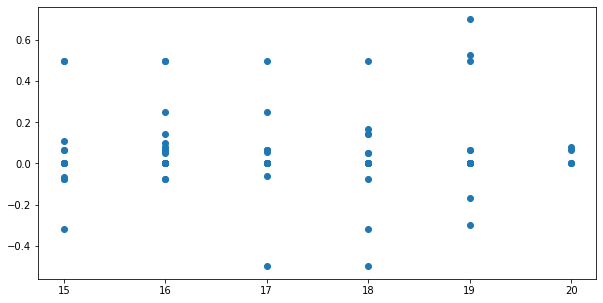

In [307]:
plt.figure(figsize=(10,5))
plt.scatter(data['date'].apply(lambda d: d.hour),data['polarity'])

### Cree un nuevo clasificador
Vamos 
https://textblob.readthedocs.io/en/dev/classifiers.html#classifiers

* A favor del Paro → `'fav'`
* En contra del Paro→ `'con'`

Para crear los conjutos de datos para training y para test debemos clasisificar un conjunto suficientemente grande de textos de tweets en las dos categorias en números similares para cada una de las dos categorias

Crearemos un algoritmo que nos permite clasificar algunos tweets del DataFrame en una nueva columna `'label'`, la cual tendrá un valor nulo cuando el tweet no este clasificado. Una vez un tweet sea clasificado, se añadirá a una lista de similaridad y sólo se clasificarán nuevos tweets que no sean similares a los previamente clasificados.  Para ello se usará el método `extractOne` del módulo `process` de `fuzzywuzzy` con scorer `fuzz.ratio` basado en la distancia Levenshtein entre dos textos.

In [ ]:
from fuzzywuzzy import process
from fuzzywuzzy import  fuzz

In [206]:
process.extractOne('hola',['mundo'],scorer=fuzz.ratio)[-1]

22

In [214]:
df[:1]

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,label
0,Aníbal Cano,,Optimista alegre de esta maravillosa vida que Dios Todopoderoso nos entregó . . .,False,2021-05-18 20:35:32,"RT @UnivalleU: #Movilización ✊ Gran Marcha del Millón ¡#Cali Despertó!\n\nMovilización familiar, artística y cultural de un millón de persona…","[Movilización, Cali]",Twitter for Android,None


In [353]:
tweet=df.loc[0,'text']

In [ ]:
n_train=100
n_test=50
n_traintest=n_train+n_test
df['label']=None
ii=0
similarity=[]
for i in df.index:
    print("="*80)
    tweet=df.loc[i,'text']
    if similarity:
        if process.extractOne(tweet,similarity,scorer=fuzz.ratio)[-1]<90:
            similarity.append(tweet)
            posneg=input(f"{tweet}: https://twitter.com/twitter/status/{df.loc[i,'id']}\n → f/c para 'a favor'/'en contra' or <Enter> para continuar:\n")
            if posneg=='c':
                posneg='con'
            elif posneg=='f':
                posneg='fav'
            else:
                continue
            df.loc[i,'label']=posneg
            ii=ii+1
    else:
        similarity.append(tweet)

    if ii==n_traintest:
        break

Select the train/test filtered DataFrame

In [256]:
tmp=df[~df['label'].isna()].reset_index(drop=True)

In [360]:
tmp[:3]

,user_name,user_location,user_description,user_verified,date,text,hashtags,source,id,label
0,¡#55/86 en 2022!🦍🦍💪💎💎👏👏🚀🚀🌕,,#sigamonoslosbuenos #movimientoantiuribista,False,2021-05-18 20:35:29,"RT @PoloDemocratico: El #ParoNacional es la manifestación del pueblo por la inconformidad qué hay con el gobierno de @IvanDuque, queremos q…",[ParoNacional],Twitter for iPhone,1394753529844219907,fav
1,💤#Dreamer👀🧠💓 🇨🇴🇪🇸,"Barcelona, España","Hasta los🥚🥚de la #DESinformación y #MIEDO que generan la Prensa y el Gobierno😡\n\nNo creas NADA de lo que leas, escuches o veas #Investiga #Lee #Cuestiona 🧠♥️",False,2021-05-18 20:31:51,"@clarincom Estos son los del entierro del Diego?\nO más de la mentira diaria del #GobiernoDeInutiles \n\n#Covidiano🐑😷💉Evita las aglomeraciones, #VirusChino sabe cuándo sales a protestar y NO ATACA\nAún crees que #FalsaPandemia se trata de Salud Pública?😂🤣\n#Argentina #Colombia #ParoNacional https://t.co/6jAXYRVEQ4","[GobiernoDeInutiles, Covidiano]",Twitter for Android,1394752616765198338,con
2,ingrid tatiana,colombia,Soy Una Idiota Por Pensar Que Por Una Vez En La Vida Podía Contar Contigo ...,False,2021-05-18 20:31:42,"RT @JorgeOvalleB: #DesempleoJuvenil Para el 2020 el desempleo juvenil en #CALI fue de 29,1% con 112.929 jóvenes desempleados/as, con 26 mil…","[DesempleoJuvenil, CALI]",Twitter for Android,1394752578718773256,fav


In [257]:
tmp.shape

(149, 10)

In [258]:
train=tmp[:n_train][['text','label']]

In [259]:
from textblob.classifiers import NaiveBayesClassifier

In [260]:
train.to_json('train.json',orient='records')

In [261]:
import nltk
nltk.download('punkt')  

[nltk_data] Downloading package punkt to /home/restrepo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [262]:
with open('train.json', 'r') as fp:
     cl = NaiveBayesClassifier(fp, format="json")

In [311]:
test=tmp[n_train:][['text','label']].reset_index(drop=True)

In [312]:
test.to_json('test.json',orient='records')

In [313]:
fulltest=test.copy()
fulltest['test']=fulltest['text'].apply(cl.classify)

In [362]:
fulltest[['text','label','test']][:3]

,text,label,test
0,RT @FabioCardozoM: Como asumirá usted @JorgeIvanOspina la orden presidencial de levantar los bloqueos en #Cali haciendo uso del mayor despl…,con,con
1,RT @TatyMunozO: Los bloqueos afectan al pueblo que dicen estar defendiendo. Empresas están a punto de cerrar para dejar muchos desempleados…,con,con
2,RT @arturo2driguez: Compartan por favor sus carteles informativos sobre los puntos de manifestación de mañana #19M en todo el país.\n#ParoNa…,fav,fav


In [363]:
cl.accuracy( [ (d.get('text'),d.get('label')) for d in test.to_dict(orient='records')] )

0.7551020408163265

In [326]:
fulltest['prob']=fulltest['text'].apply(lambda t:   
                                cl.prob_classify( t ).prob(   cl.classify( t  )  ) ).round(2)

In [364]:
fulltest[:7]

,text,label,test,prob
0,RT @FabioCardozoM: Como asumirá usted @JorgeIvanOspina la orden presidencial de levantar los bloqueos en #Cali haciendo uso del mayor despl…,con,con,0.98
1,RT @TatyMunozO: Los bloqueos afectan al pueblo que dicen estar defendiendo. Empresas están a punto de cerrar para dejar muchos desempleados…,con,con,1.00
2,RT @arturo2driguez: Compartan por favor sus carteles informativos sobre los puntos de manifestación de mañana #19M en todo el país.\n#ParoNa…,fav,fav,1.00
3,Conozca el mapa de la solidaridad caleña #ParoNacional #SOSCaliDDHH #SOSCali https://t.co/4Q0MMpgwJK @BienestarSociaI @chucho_gonzalez @AlcaldiaDeCali @JorgeIvanOspina @GSocialValle @Arqui_Cali @arzobispodecali @TICAlcaldiaCali @STransparencia @personeriacali @ConcejoCali,fav,con,0.85
4,RT @personeriacali: #AEstaHora Continuamos realizando acompañamiento como garantes de derechos humanos en los diferentes puntos de #Cali do…,fav,con,1.00
5,"#ParoNacional18M #SOSColombiaDDHH #ParoNacional #SOSColombia #ParoNacional \n\n""Al igual que otros partidos populistas del mundo, el Centro Democrático de Uribe y Duque ejerce su poder mediante una estrategia que consiste en avivar agresivamente a su base:""\nhttps://t.co/VwH4eg521c",fav,fav,0.99
6,"#Colombia 🇨🇴 | Ciudadanos denunciaron este martes que el #Esmad de la Policía reprimió la noche del lunes a las personas que se manifestaban en varias ciudades del país, en el marco del #ParoNacional https://t.co/3rPldywItQ",fav,fav,1.00


Aplicar al DataFrame Completo

In [ ]:
df['test']=df['text'].apply(cl.classify)
df['prob']=df['text'].apply(lambda t:   
                                cl.prob_classify( t ).prob(   cl.classify( t  )  ) ).round(2)

In [389]:
dfp=df.drop_duplicates('text').reset_index(drop=True)

In [390]:
dfp[['text','test','prob']].sample(10)

,text,test,prob
1345,@rcnradio Primer vez en #Colombia que un #ParoNacional dura 21 días adornado con infames bloqueos y vandalismo! Duque permite la dictadura de bloqueos y vandalismo! #Duquedespierte @CNNEE,con,0.78
222,RT @CABLENOTICIAS: #EnVideo | Centenar de cristianos llegan a esta hora a la Plaza de Bolívar para orar por la paz de Colombia en medio de…,con,1.00
1258,"@IvanDuque Este y sus asesores son unos payasos y unos títeres, utilizando la fuerza como dice el asesino de Uribe, le recuerdo que tampoco existe derecho a matar, a robar al pueblo, si existe el derecho a una vida digna y todo lo que conlleva #NoMasUribe #ParoNacional #NosEstanMantando",con,1.00
1453,"@IvanDuque No existe en colombia ningun derecho a desaparecer persona, a asesinar personas en paro, a que civiles les disparen, no existe ningun derecho a asesinar lideres civiles. No existe en colombia ningun derecho a ser elegido con votos del narcotrafico\n#ParoNacional",con,0.79
465,"RT @erickzaraza: Siguen las agresiones del Esmad; lo he estado diciendo, los señores del comité del paro, deben ser enfáticos con el gobier…",con,0.77
1711,"Para Colombia, el Agro, la Internacionalización y la Innovación No a la #MasacreLaboralTemporalesSENA #TemporalesSENAFormalizados #ProrrogaYa los \n@TemporalesSENA piden apoyo @ESAPOficial @wilsonariasc @dnp_colombia @MintrabajoCol @cutcolombia #ParoNacional https://t.co/ix0pkpNK07",fav,0.85
1632,"RT @anasil33: Lo que sucede en Colombia es un ATAQUE TERRORISTA , dejen de decirle protesta social, las cosas por su nombre!\n#ParoAsesino…",con,0.65
896,"RT @GABRIELAP_ORTIZ: La gente que dice: ""acepto el paro, pero no los bloqueos"", ¿sabrán que paro significa PARAR y que parar significa dete…",con,1.00
1412,RT @Dejusticia: #ParoNacional #Colombia Tenemos una propuesta para salir de la espiral de violencia que ha causado el uso desproporcionado…,fav,0.60
836,🔴 Ayúdanos a compartir la transmisión de toda la información en esta jornada 21 de #ParoNacional. \n\nAcompañamos a la ciudadanía en el Concejo de Bogotá y en el Portal Américas \n\nEmisión en Directo aquí ⬇️\nhttps://t.co/yzbXckJbfu,fav,0.97


In [391]:
dfp.groupby('test')['test'].count()

test
con    882
fav    871
Name: test, dtype: int64

Sin quitar RT

In [392]:
df.groupby('test')['test'].count()

test
con    1881
fav    3119
Name: test, dtype: int64

### Mejorar la precisión preprocesando los tweets

In [192]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/restrepo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

See:
* https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python

In [193]:
import re
stop_words=['rt',':']#+stopwords.words('spanish')
def preprocess_tweet_text(tweet):
    tweet=tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, re.UNICODE ,flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    #tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = tweet.replace("  "," ").split()
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)